In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read all data 
A = pd.read_html('Report16Jul2021120356.html')
#A

In [3]:
# choosing the data that we will use 
A1=A[11]
#A1

In [4]:
# changing the first row to be a header for all data
new_header1 = A1.iloc[0] #grab the first row for the header
A2 = A1[365:514] #take the data less the header row
A2.columns = new_header1 #set the header row as the df header
A2 = A2.reset_index(drop=True)#reset indexes
#A2

In [5]:
Indicator = A2.copy()#create a copy of the data
Indicator

,Date,High,Low,Open,Close,Volume,InterestYield,CapitalPaymentYield,TotalDistributionYield,EY,P/E,DY
0,31 Jan 2020,16198,15748,16115,15748,4475345,0.00,0.00,5.05,11.38,8.79,5.05
1,30 Jan 2020,16273,15802,16120,16162,2214622,0.00,0.00,4.92,11.09,9.02,4.92
2,29 Jan 2020,16204,16007,16015,16121,3108494,0.00,0.00,4.93,11.12,9.00,4.93
3,28 Jan 2020,16137,15803,16137,15990,1707391,0.00,0.00,4.97,11.21,8.92,4.97
4,27 Jan 2020,16300,15809,16300,15965,2018378,0.00,0.00,4.98,11.22,8.91,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...
144,05 Jul 2019,19235,18754,19100,18896,2910485,0.00,0.00,4.11,9.25,10.81,4.11
145,04 Jul 2019,19460,19139,19373,19154,1577098,0.00,0.00,4.05,9.13,10.96,4.05
146,03 Jul 2019,19456,19118,19450,19263,2216618,0.00,0.00,4.03,9.08,11.02,4.03
147,02 Jul 2019,19887,19110,19887,19464,2640878,0.00,0.00,3.99,8.98,11.13,3.99


In [6]:
Indicator['Date'] = pd.to_datetime(Indicator.Date)#changing date format
#Indicator

In [7]:
#making values to be type float
Indicator['High']=Indicator.High.astype('float')
Indicator['Close']=Indicator.Close.astype('float')
Indicator['Low']=Indicator.Low.astype('float')
Indicator['Open']=Indicator.Open.astype('float')

In [8]:
#deleting all other columns not used
del Indicator['Volume'],Indicator['TotalDistributionYield'], Indicator['InterestYield'], Indicator['CapitalPaymentYield'], Indicator['EY'], Indicator['DY'], Indicator['P/E']
#Indicator

In [9]:
Indicator["Close"].describe() #descriptive statistics

count      149.000000
mean     17505.221477
std        892.525409
min      15748.000000
25%      16868.000000
50%      17450.000000
75%      18077.000000
max      19674.000000
Name: Close, dtype: float64

In [10]:
def RSI(value):
    '''
    The function calculates the relative strength index parameters 
    to be used to calculate 14_day rsi values
    '''
    up = value[value>0].mean()
    down = -value[value<0].mean()
    return (100 * up / (up + down))

Indicator['Direction'] = (Indicator['Close'] - Indicator['Close'].shift(1)) #adding momentum
Indicator['RSI_14D'] = Indicator['Direction'].rolling(center=False, window=14).apply(RSI) #14D RSI

In [11]:
#Indicator['RSI_14D']

In [12]:
l = []
for i in range (len(Indicator)):
    if Indicator['RSI_14D'][i] >= 28 and Indicator['RSI_14D'][i] <= 30: #values in this range satisfy a buy conditionsold
        l.append(1) #buy
    elif Indicator['RSI_14D'][i] >= 31 and Indicator['RSI_14D'][i] <= 69:#values in this range satisfy a hold condition
        l.append(2) #hold
    elif Indicator['RSI_14D'][i] >= 70:#values in this range satisfy a sell condition
        l.append(3)#sell
    else:
        l.append(2) #hold signal
Indicator['RSI_sig'] = l

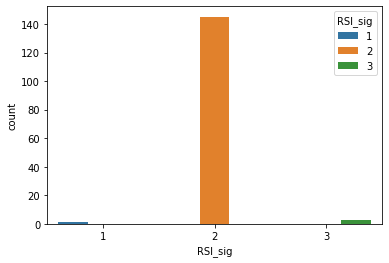

2    145
3      3
1      1
Name: RSI_sig, dtype: int64

In [13]:
sns.countplot(x = 'RSI_sig', data=pd.DataFrame(Indicator), hue='RSI_sig')#plots frequency of signals
plt.savefig("stan_rsicount")
plt.show()
Indicator['RSI_sig'].value_counts() #counts according to signal code 

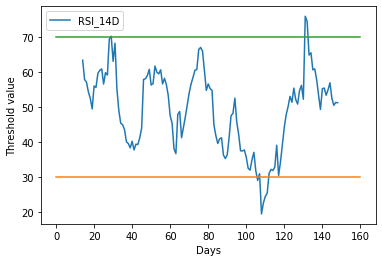

In [14]:
#graphical presentation of the indicator
r = Indicator['RSI_14D']
h = [0,160]
b = [30,30]
f = plt.plot(r, label = 'RSI_14D')
e = [70,70]
g = plt.plot(h,b,h,e) + f
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("stan_rsi")
plt.show(g)

In [15]:
n=21
Indicator['STOK'] = ((Indicator['Close'] - Indicator['Low'].rolling(window=n,center=False).mean()) /
                     (Indicator['High'].rolling(window=n, center=False).max() - 
                      Indicator['Low'].rolling(window=n, center=False).min())) * 100 #D% stochastic
Indicator['STOD'] = Indicator['STOK'].rolling(window = 7, center=False).mean()  #K% stochastic 

In [16]:
m = []
for i in range (len(Indicator)):
    if Indicator['STOK'][i] >= 28 and Indicator['STOK'][i]<=30:#values in this range satisfy a buy condition
        m.append(1) #buy
    elif Indicator['STOK'][i] > 30 and Indicator['STOK'][i] <= 69:#values in this range satisfy a hold condition
        m.append(2) #sell    
    elif Indicator['STOK'][i] >= 70:#values in this range satisfy a sell condition
        m.append(3) #sell
    else:
        m.append(2) #hold
Indicator['STO_sig'] = m

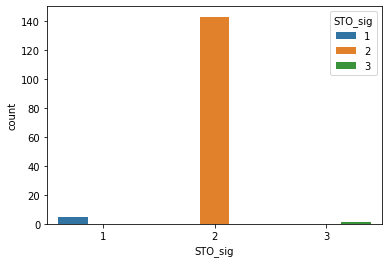

2    143
1      5
3      1
Name: STO_sig, dtype: int64

In [17]:
sns.countplot(x = 'STO_sig', data=pd.DataFrame(Indicator), hue='STO_sig')#plots frequency of signals
plt.savefig("stan_stocount")
plt.show()
Indicator['STO_sig'].value_counts()#counts according to signal

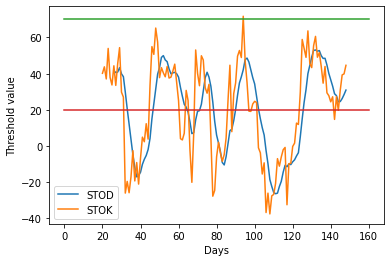

In [18]:
#graphical presentation of the indicator
t = Indicator['STOD']
j = Indicator['STOK']
u = plt.plot(t, label = 'STOD')
s = plt.plot(j, label = 'STOK')
h = [0,160]
b = [20,20]
e = [70,70]
g = plt.plot(h,e,h,b) + u + s
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("stan_sto")
plt.show()

In [19]:
Indicator['EMA_10'] = Indicator['Close'].ewm(span=10,adjust=False,min_periods=1).mean() #10day exponential ma
Indicator['EMA_30'] = Indicator['Close'].ewm(span=20,adjust=False,min_periods=1).mean() #30day exponential ma
Indicator['EMA_90'] = Indicator['Close'].ewm(span=90,adjust=False,min_periods=1).mean() #90day exponential ma

In [20]:
# append 1 for a buy, 0 for a sell and 2 for hold and NaN
n = []
for i in range (len(Indicator)):
    if Indicator['EMA_10'][i] < Indicator['EMA_30'][i] and Indicator['EMA_90'][i]:#values in this range satisfy a buy condition
        n.append(1) #buy
    elif Indicator['EMA_10'][i] > Indicator['EMA_30'][i] and Indicator['EMA_90'][i]:#values in this range satisfy a hold condition
        n.append(3) #sell
    elif Indicator['EMA_10'][i] == Indicator['EMA_30'][i] == Indicator['EMA_90'][i]:#values in this range satisfy a sell condition
        n.append(2)  #hold      
    else:
        n.append(2)#hold
Indicator['EMA_sig'] = n     

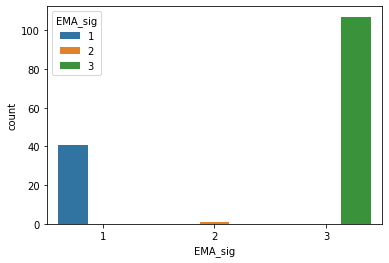

3    107
1     41
2      1
Name: EMA_sig, dtype: int64

In [21]:
sns.countplot(x = 'EMA_sig', data=pd.DataFrame(Indicator), hue='EMA_sig')#plots frequency of signals
plt.savefig("stan_emacount")
plt.show()
Indicator['EMA_sig'].value_counts()#counts according to signal

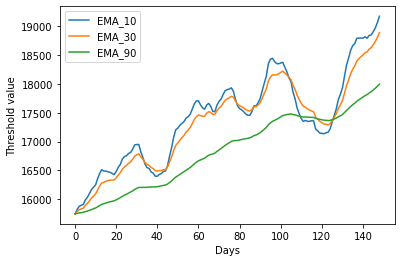

In [22]:
# buy if 10EMA line cuts the other two EMA lines from above and moves below both the EMAs
# sell if 10EMA line cuts the other two EMA lines from below and moves above both the EMAs
a = Indicator['EMA_10'] #10 day exponential moving average
b = Indicator['EMA_30'] #30 day exponential moving average
c = Indicator['EMA_90'] #90 day exponential moving average
d = plt.plot(a, label = 'EMA_10' ) + plt.plot(b, label = 'EMA_30') + plt.plot(c, label = 'EMA_90')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("stan_ema")
plt.show(d)

In [23]:
Indicator['26_ema'] = Indicator['Close'].ewm(span=26,adjust=True,ignore_na=False).mean() #26day ema
Indicator['12_ema'] = Indicator['Close'].ewm(span=12,adjust=True,ignore_na=False).mean() #12day ema
Indicator['MACD'] = Indicator['12_ema'] - Indicator['26_ema'] #macd
Indicator['9EMA_MACD'] = Indicator['MACD'].ewm(span=9,adjust=True,ignore_na=False).mean() #9daymacd_ema
#Indicator

In [24]:
f = []
for i in range (len(Indicator)):
    if Indicator['MACD'][i] > Indicator['9EMA_MACD'][i]:#values in this range satisfy a buy condition
        f.append(1) #buy
    elif Indicator['MACD'][i] < Indicator['9EMA_MACD'][i]:#values in this range satisfy a sell condition
        f.append(3) #sell     
    else:
        f.append(2)#hold
Indicator['MACD_sig'] = f 

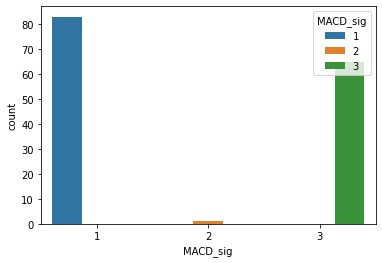

1    83
3    65
2     1
Name: MACD_sig, dtype: int64

In [25]:
sns.countplot(x = 'MACD_sig', data=pd.DataFrame(Indicator), hue='MACD_sig')#plots frequency of signals
plt.savefig("stan_macdcount")
plt.show()
Indicator['MACD_sig'].value_counts()#counts according to signal

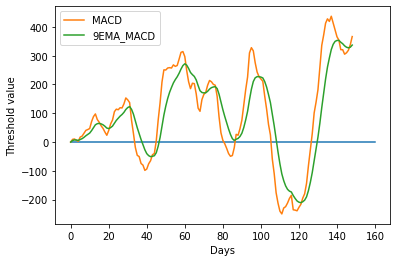

In [26]:
#graphical presentation of the indicator
q = Indicator['9EMA_MACD']
e = Indicator['MACD']
z = [0,160]
x = [0,0]
r = plt.plot(z,x)+ plt.plot(e, label = 'MACD') +plt.plot(q, label = '9EMA_MACD')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("stan_macd")
plt.show(r)

In [27]:
#changing to array format for easy adding
new1 = Indicator['RSI_sig'].to_numpy()
new2 = Indicator['MACD_sig'].to_numpy()
new3 = Indicator['EMA_sig'].to_numpy()
new4 = Indicator['STO_sig'].to_numpy()

In [28]:
b = []
for i in range (len(new2)):
    if new1[i] + new2[i] + new3[i] + new4[i] <= 6:#values in this range satisfy a buy decision
        b.append(1)
    elif new1[i] + new2[i] + new3[i] + new4[i] >=10:#values in this range satisfy a sell decision
        b.append(3)
    else:
        b.append(2)#hold
new5 = pd.Series(b)  
#new5

In [29]:
Indicator['Decision'] = new5
Indicator

,Date,High,Low,Open,Close,Direction,RSI_14D,RSI_sig,STOK,STOD,...,EMA_10,EMA_30,EMA_90,EMA_sig,26_ema,12_ema,MACD,9EMA_MACD,MACD_sig,Decision
0,2020-01-31,16198.0,15748.0,16115.0,15748.0,NaN,NaN,2,NaN,NaN,...,15748.000000,15748.000000,15748.000000,2,15748.000000,15748.000000,0.000000,0.000000,2,2
1,2020-01-30,16273.0,15802.0,16120.0,16162.0,414.0,NaN,2,NaN,NaN,...,15823.272727,15787.428571,15757.098901,3,15962.961538,15972.250000,9.288462,5.160256,1,2
2,2020-01-29,16204.0,16007.0,16015.0,16121.0,-41.0,NaN,2,NaN,NaN,...,15877.404959,15819.197279,15765.096727,3,16019.743223,16030.307159,10.563936,7.374879,1,2
3,2020-01-28,16137.0,15803.0,16137.0,15990.0,-131.0,NaN,2,NaN,NaN,...,15897.876784,15835.464205,15770.039657,3,16011.428318,16017.583764,6.155447,6.961792,3,3
4,2020-01-27,16300.0,15809.0,16300.0,15965.0,-25.0,NaN,2,NaN,NaN,...,15910.081005,15847.800947,15774.324499,3,16000.661399,16003.296944,2.635544,5.674831,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2019-07-05,19235.0,18754.0,19100.0,18896.0,-151.0,56.990205,2,19.758249,24.401514,...,18847.396249,18627.499706,17864.674088,3,18504.831443,18810.143654,305.312211,334.386280,3,3
145,2019-07-04,19460.0,19139.0,19373.0,19154.0,258.0,52.554028,2,30.839480,24.601744,...,18903.142386,18677.642591,17893.010921,3,18552.918637,18863.044630,310.125993,329.534222,3,3
146,2019-07-03,19456.0,19118.0,19450.0,19263.0,109.0,50.529191,2,39.305329,26.239694,...,18968.571043,18733.390916,17923.120571,3,18605.517899,18924.576226,319.058327,327.439043,3,3
147,2019-07-02,19887.0,19110.0,19887.0,19464.0,201.0,51.338695,2,39.872551,28.444169,...,19058.649035,18802.972733,17956.986053,3,18669.109884,19007.564499,338.454614,329.642158,1,2


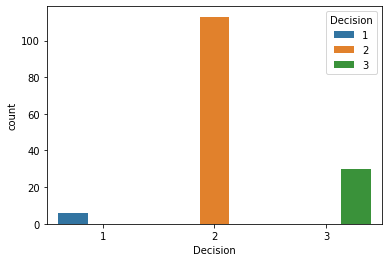

2    113
3     30
1      6
Name: Decision, dtype: int64

In [30]:
sns.countplot(x = 'Decision', data=pd.DataFrame(Indicator), hue='Decision')#plots frequency of signals
plt.savefig("stan_decision")
plt.show()
Indicator['Decision'].value_counts()#counts according to signal

In [31]:
Indicator['Decision'].value_counts(normalize=True) * 100 #calculates signal frequency in percentage

2    75.838926
3    20.134228
1     4.026846
Name: Decision, dtype: float64